In [387]:
!pip install nltk

In [388]:
# Import All the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import string

In [389]:
df = pd.read_csv("spam.csv", encoding = "latin1")

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [391]:
#********************************************** EDA = Exploratory Data Analysis and Data preprocessing************************************

In [392]:
df["v1"].isna().sum()
# V1 is no null values

0

In [393]:
df["v1"].value_counts()
# v1 is catagorical column with 2 classes

v1
ham     4825
spam     747
Name: count, dtype: int64

<Axes: ylabel='count'>

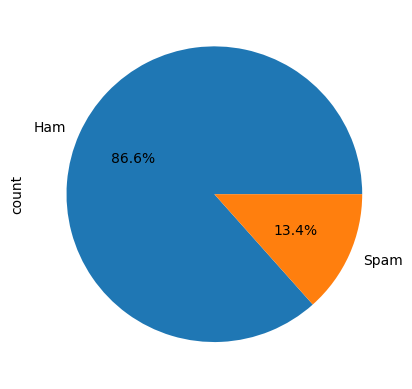

In [394]:
df["v1"].value_counts().plot(kind = "pie", labels = ["Ham", "Spam"], autopct = "%0.1f%%")
# most of data is Ham , hence data is imbalance, while applying models, do not depend on accuracy 
# since it will shift towards "ham", as it is more in data.

In [395]:
# Also the v1 column is a catagorical and we have to encode it in 0 and 1.
# So we will use label encoding,This is useful when you have binary categorical data, 
# meaning a column that has only two unique values (e.g., "Yes" and "No" or "Male" and "Female"). 
# LabelEncoder from sklearn.preprocessing can be used for this.

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder i.e making instance of LabelEncoder
le = LabelEncoder()
df["v1"] = le.fit_transform(df["v1"])


In [396]:
df["v1"].head()
# Now it is in 0's and 1's 

0    0
1    0
2    1
3    0
4    0
Name: v1, dtype: int32

In [397]:
# Now for  "Unnamed: 2" ,"Unnamed: 3","Unnamed: 4"

df[["Unnamed: 2", "Unnamed: 3","Unnamed: 4"]].count()

# Since there are 5572 rows and in these columns only 50, 12, 6 rows have not-null values
# hence these columns are not  important for us, so we will drop these. 

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [398]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], inplace = True )

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int32 
 1   v2      5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [400]:
# Now for "v2" column

In [401]:
df["v2"].head()
# it contains messages

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [402]:
# Now we will caluclate number of characters in each message
df["No_of_characters"] = df["v2"].apply(len)
df.head()

,v1,v2,No_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


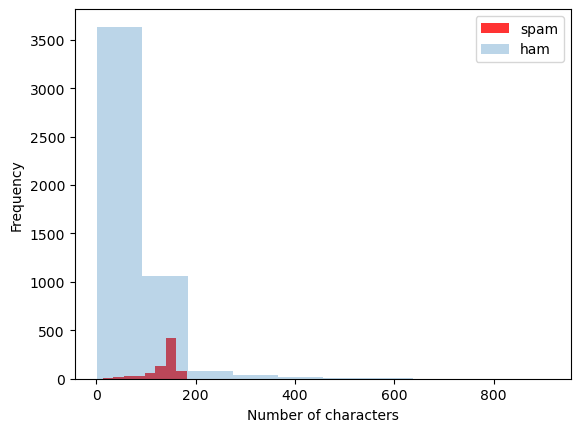

In [403]:
plt.hist(df[(df["v1"] == 1)]["No_of_characters"], label = "spam",alpha = 0.8, color = "red")
plt.hist(df[(df["v1"] == 0)]["No_of_characters"], label = "ham",alpha = 0.3)
plt.legend()
plt.xlabel("Number of characters")
plt.ylabel("Frequency")
plt.show()

# Key Takeaways:

# Spam emails tend to have more characters than non-spam emails.
# Most ‘ham’ emails are short, while ‘spam’ emails vary in length.

In [404]:
# Now we will analyse the no of words and sentence in ham and spam
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\NITIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [405]:
df["No_of_words"] = df["v2"].apply(lambda x: len(nltk.word_tokenize(x)))

In [406]:
df.head()

,v1,v2,No_of_characters,No_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [407]:
df["No_of_sentence"] = df["v2"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [408]:
df.head()

,v1,v2,No_of_characters,No_of_words,No_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


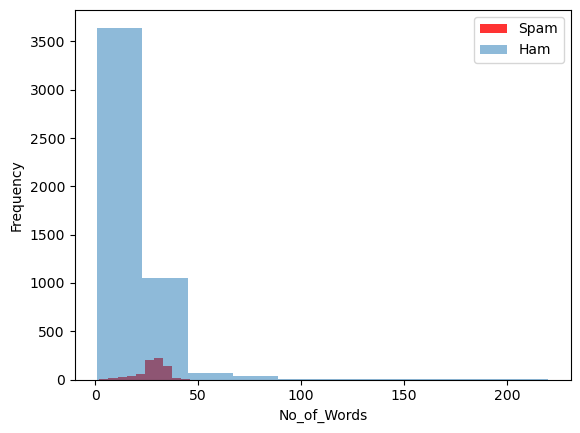

In [409]:
plt.hist(df[(df["v1"] == 1)]["No_of_words"], alpha = 0.8, label = "Spam", color = "red")
plt.hist(df[(df["v1"] == 0)]["No_of_words"], alpha = 0.5, label = "Ham")
plt.legend()
plt.xlabel("No_of_Words")
plt.ylabel("Frequency")
plt.show()

# Key takeaways

# Spam emails tend to have more words than non-spam emails.

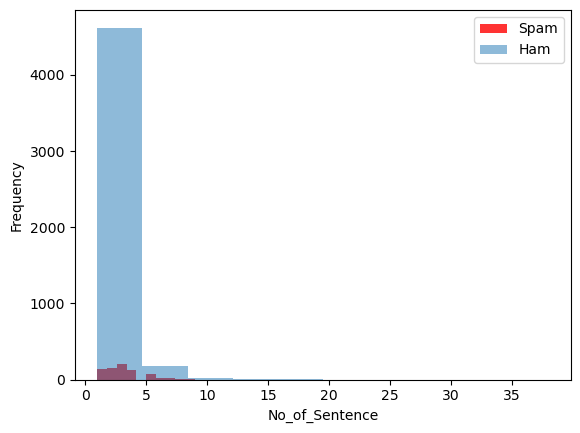

In [410]:
plt.hist(df[(df["v1"] == 1)]["No_of_sentence"], alpha = 0.8, label = "Spam", color = "red")
plt.hist(df[(df["v1"] == 0)]["No_of_sentence"], alpha = 0.5, label = "Ham")
plt.legend()
plt.xlabel("No_of_Sentence")
plt.ylabel("Frequency")
plt.show()

# Not as much i can read but both tends to have same no of sentences but ham have slightly high no of sentences.


In [411]:
# Now i will change the names of columns
df.rename(columns ={"v1" : "target", "v2" : "text"}, inplace = True )

In [412]:
df.head()

,target,text,No_of_characters,No_of_words,No_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


' Strength of Correlation:\n\n-> Strong Correlation: The coefficient is close to 1 (positive) or -1 (negative). Typically, correlations greater than |0.7| (either positive or negative) indicate a strong relationship.\n-> Moderate Correlation: The coefficient is between |0.3| and |0.7|.\n-> Weak Correlation: The coefficient is close to 0, typically less than |0.3|. '

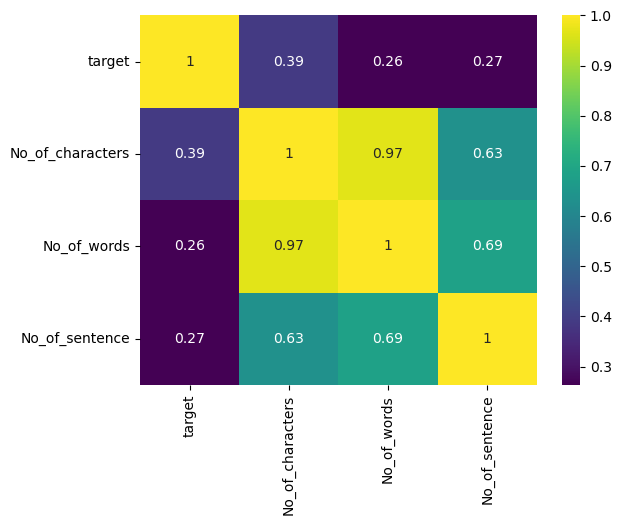

In [413]:
# Now lets build a correlation matrix
subset_df = df[["target", "No_of_characters", "No_of_words", "No_of_sentence"]]
sns.heatmap(subset_df.corr(), annot=True, cmap="viridis")

# Here key takeaway is that No_of_characters has Moderate Correlation with target variable.

""" Strength of Correlation:

-> Strong Correlation: The coefficient is close to 1 (positive) or -1 (negative). Typically, correlations greater than |0.7| (either positive or negative) indicate a strong relationship.
-> Moderate Correlation: The coefficient is between |0.3| and |0.7|.
-> Weak Correlation: The coefficient is close to 0, typically less than |0.3|. """

---------------------- Now lets preprocess our text to improve the performance of models----------------------
We will make a function which will perform all the text preprocessing like:
- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop words And Punctution
- Stemming

Note : What is the need of tokenization if we again joining the sentence ?Answer is " Tokenization allows you to perform word-level transformations, and rejoining makes the text ready for models that require continuous input."


In [415]:
from nltk.stem.porter import PorterStemmer
text_porter = PorterStemmer()
def text_preprocessing(text):
    text =  text.lower() # make all characters in lower case
    text = nltk.word_tokenize(text) # make a list of all words
    y = []
    
    for i in text:    # keeping only alpha numeric characters
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in nltk.corpus.stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(text_porter.stem(i))

    return " ".join(y)
    

In [416]:
# Now Using the Function
df["preprocessed_text"] = df["text"].apply(text_preprocessing)
df.head()

,target,text,No_of_characters,No_of_words,No_of_sentence,preprocessed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now lets generate a word cloud and see what is frequency of words or what the most
frequent Words in spam and ham messages.

In [418]:
! pip install wordcloud
from wordcloud import WordCloud

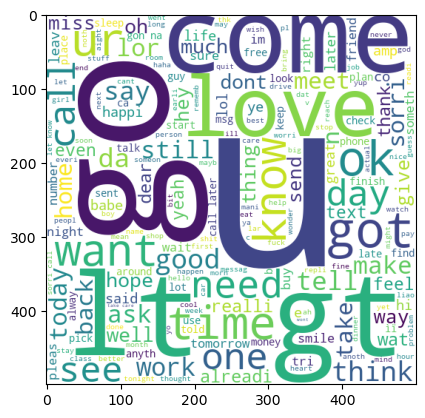

In [419]:
wc = WordCloud(width = 500, height = 500, background_color = "white")
wc_ham = wc.generate(df[df["target"] == 0]["preprocessed_text"].str.cat(sep = " "))

# here series.str.cat( sep = ) will extract strings from different rows and join them with space.

plt.imshow(wc_ham)

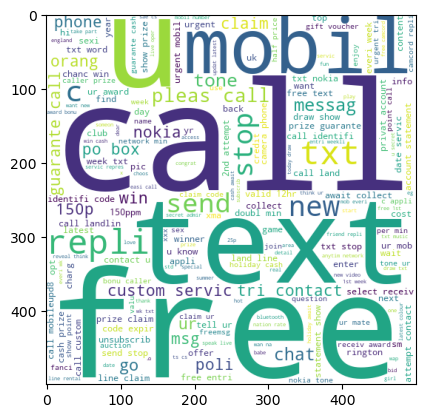

In [420]:
# Same for spam
wc_spam = wc.generate(df[df["target"] == 1]["preprocessed_text"].str.cat(sep =" "))
plt.imshow(wc_spam)


In [421]:
# So we can see or examine what are most frequent words.

# Text vectorization

In [423]:
# Using bag of Words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [424]:
X = tfidf.fit_transform(df["preprocessed_text"]).toarray()

In [425]:
y = df["target"].values

# Model Building

In [427]:
from sklearn.model_selection import train_test_split

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [429]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [430]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [431]:
# applying Gausssian Naive bais
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred1)}", end = "\n\n")
print(f"Preccision = {precision_score(y_test, y_pred1)}", end = "\n\n")
print(f" Confusion Matrix : \n{confusion_matrix(y_test, y_pred1)}", end = "\n\n")

Accuracy = 0.8690582959641255

Preccision = 0.5252100840336135

 Confusion Matrix : 
[[844 113]
 [ 33 125]]



In [432]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred2)}", end = "\n\n")
print(f"Preccision = {precision_score(y_test, y_pred2)}", end = "\n\n")
print(f" Confusion Matrix : \n{confusion_matrix(y_test, y_pred2)}", end = "\n\n")

Accuracy = 0.957847533632287

Preccision = 1.0

 Confusion Matrix : 
[[957   0]
 [ 47 111]]



In [433]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, y_pred3)}", end = "\n\n")
print(f"Preccision = {precision_score(y_test, y_pred3)}", end = "\n\n")
print(f" Confusion Matrix : \n{confusion_matrix(y_test, y_pred3)}", end = "\n\n")

Accuracy = 0.9695067264573991

Preccision = 0.9920634920634921

 Confusion Matrix : 
[[956   1]
 [ 33 125]]



- Since  using tfidf and with MultinomialNB we are getting high precision so we will chose this model.
- Here we have considered Preccision over accuracy since our data is biased and we want to decrease  false positives.

In [435]:
# Now we serialize the objects
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))